1. 提取图片的特征点
2. 找到两张图片中的相同特征点。
3. 根据2中找到相同特征点之间的位置关系，使用最小二乘法求解方程计算出相机发生的旋转。

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
# pA和pB分别表示是我们找到的图A与图B中的四个相同特征点。
pA = np.array([[221,  31],
       [413,  20],
       [416, 304],
       [228, 308]], dtype=np.float32)
pB = np.array([[214,   7],
       [404,  34],
       [352, 314],
       [169, 280]], dtype=np.float32)

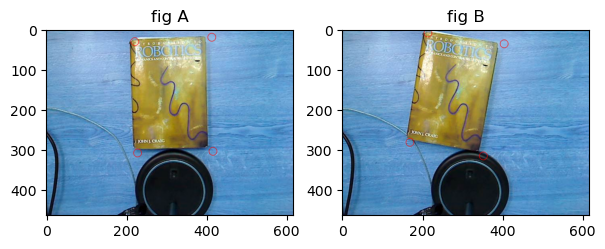

In [18]:
imgA_mat = cv2.imread('./book_A.jpg')
imgB_mat = cv2.imread('./book_B.jpg')

keyPoints_A = [cv2.KeyPoint(pt[0], pt[1], 20) for pt in pA]
keyPoints_B = [cv2.KeyPoint(pt[0], pt[1], 20) for pt in pB]
cv2.drawKeypoints(imgA_mat,keyPoints_A, imgA_mat, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(imgB_mat,keyPoints_B, imgB_mat, color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

_, axes = plt.subplots(1, 2, figsize=(7, 3))
axes[0].set_title('fig A')
axes[0].imshow(imgA_mat)
axes[1].set_title('fig B')
axes[1].imshow(imgB_mat)
plt.show()

一定可以找到一个旋转矩阵R，使得$AR=B$。
根据最小二乘法有：  
$R=(A^TA)^{-1}A^TB$

In [ ]:
##########使用最小二乘法求旋转矩阵R############
R = np.matmul(np.matmul(np.linalg.inv(np.matmul(pA.T, pA)), pA.T), pB)
print(R)
'''
[[cos(theta), -sin(theta)],
 [sin(theta),  cos(theta)]]
'''

print(imgA_mat.shape, imgB_mat.shape)
# (463, 616, 3) (462, 616, 3) 通道数在最后

(rows,cols) = imgA_mat.shape[:2]
# 用于构建一个 2x3 的旋转仿射变换矩阵
M = cv2.getRotationMatrix2D(
    center=(cols/2,rows/2),  # 旋转中心
    angle=-np.arcsin(R[0][1])*180, # 旋转角度
    scale=1 # 缩放比例
)
'''
M = 
[[alpha * cos(theta), alpha * -sin(theta),  (1-alpha*cos(theta))*center_x + (alpha*sin(theta))*center_y],
 [alpha * sin(theta), alpha * cos(theta), (1-alpha*cos(theta))*center_y - (alpha*sin(theta))*center_x]]
'''
print(M)

[[ 0.98719114  0.02441069]
 [-0.18719217  0.9405316 ]]
(463, 616, 3) (462, 616, 3)
[[  0.9970603   -0.07662088  18.64316211]
 [  0.07662088   0.9970603  -22.91869107]]


[[ 0.98719114  0.02441069]
 [-0.18719217  0.9405316 ]]


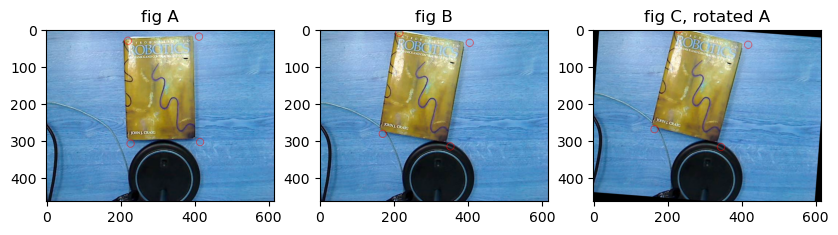

In [21]:
#######我们进行逆旋转检验下效果########
imgC_mat = cv2.warpAffine(
    src=imgB_mat,
    M=M,
    dsize=(imgA_mat.shape[:2][1], imgA_mat.shape[:2][0]))
print(R)

_, axes = plt.subplots(1, 3, figsize=(10, 3))
axes[0].set_title('fig A')
axes[0].imshow(imgA_mat)
axes[1].set_title('fig B')
axes[1].imshow(imgB_mat)
axes[2].set_title('fig C, rotated A')
axes[2].imshow(imgC_mat)